In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
#import dataframe of all unit and all period with sales and average daily cost
df = pd.read_csv('data/BenchmarkingSample20230607_with_features.csv')
df

,Unit,Date,Days,Period,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,...,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Adjusted daily Rent,Average Daily Cost
0,00040302CD88,2021-04-30,30,1,3778,20557,2190,486,5135,3983,...,3779,86173,25026,28805,39932,46241,22747,23494,15.003333,2060.983333
1,00040302CD88,2021-05-31,31,2,3805,20876,2058,1376,1553,4255,...,3807,86787,26507,30314,42499,44288,22934,21354,15.003333,1831.933333
2,00040302CD88,2021-06-30,30,3,3440,19531,2291,178,2321,4241,...,3443,78466,23950,27393,39264,39202,21822,17380,15.003333,1801.663333
3,00040302CD88,2021-07-31,31,4,3672,20999,2056,36597,3412,5515,...,3676,83742,63111,66787,81078,2664,23055,-20391,15.003333,3182.123333
4,00040302CD88,2021-08-31,31,5,3827,21357,2312,29942,3345,5484,...,3832,87277,56783,60615,74715,12562,23669,-11107,15.003333,2956.193333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0004030BEB57,2022-11-30,30,20,15729,99236,10557,75243,8789,3997,...,15749,358748,178476,194225,223582,135166,109793,25373,2175.308333,10862.118333
212,0004030BEB57,2022-12-31,31,21,12227,108507,13137,94509,1704,4989,...,12248,412437,208005,220253,267672,144765,121644,23121,2175.308333,12018.358333
213,0004030BEB57,2023-01-31,31,22,15255,101713,10812,82894,3256,4278,...,15277,347928,188885,204162,240297,107631,112525,-4894,2175.308333,11006.238333
214,0004030BEB57,2023-02-28,28,23,15020,98547,11558,83338,3605,5253,...,15043,342568,187138,202181,235670,106898,110105,-3207,2175.308333,11607.698333


# Diagram and regression analysis for all the units for each time period

<Axes: xlabel='Sales', ylabel='Average Daily Cost'>

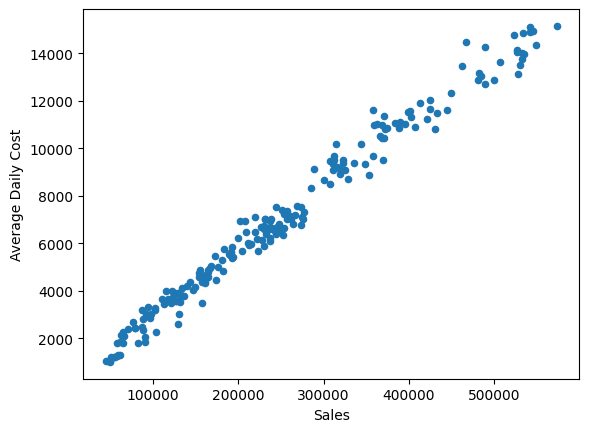

In [3]:
df.plot.scatter(x = 'Sales', y = 'Average Daily Cost')

In [4]:
y = df['Average Daily Cost']
X = df['Sales']
#need to add a constant for the intercept
X = sm.add_constant(X)

In [5]:
X.head()

,const,Sales
0,1.0,89952
1,1.0,90594
2,1.0,81909
3,1.0,87418
4,1.0,91109


In [6]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

In [7]:
fitted_model.params

const    283.555699
Sales      0.026951
dtype: float64

In [8]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Average Daily Cost   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.134e+04
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.34e-187
Time:                        11:59:32   Log-Likelihood:                -1651.4
No. Observations:                 216   AIC:                             3307.
Df Residuals:                     214   BIC:                             3314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        283.5557     71.591      3.961      0.0

# Create dummy variables 

In [9]:
# Create dummy variables for the Unit column
dummy_units = pd.get_dummies(df['Unit'], prefix='Unit', drop_first=True)
dummy_units = dummy_units.astype(int)

In [10]:
df = pd.concat([df, dummy_units], axis=1)


In [11]:
# Define the independent and dependent variables
X = df[['Average Daily Cost'] + list(dummy_units.columns)]
y = df['Sales']

In [12]:
# Add a constant to the independent variables
X = sm.add_constant(X)
X

,const,Average Daily Cost,Unit_00040302CE36,Unit_00040302CF03,Unit_00040302CF28,Unit_00040302D006,Unit_00040302D014,Unit_0004030A635E,Unit_0004030B92EE,Unit_0004030BEB57
0,1.0,2060.983333,0,0,0,0,0,0,0,0
1,1.0,1831.933333,0,0,0,0,0,0,0,0
2,1.0,1801.663333,0,0,0,0,0,0,0,0
3,1.0,3182.123333,0,0,0,0,0,0,0,0
4,1.0,2956.193333,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
211,1.0,10862.118333,0,0,0,0,0,0,0,1
212,1.0,12018.358333,0,0,0,0,0,0,0,1
213,1.0,11006.238333,0,0,0,0,0,0,0,1
214,1.0,11607.698333,0,0,0,0,0,0,0,1


In [13]:
# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

In [14]:
# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1769.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          8.58e-190
Time:                        11:59:33   Log-Likelihood:                -2389.9
No. Observations:                 216   AIC:                             4800.
Df Residuals:                     206   BIC:                             4833.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.809e+04   6656